# <center>Đồ án Python: Titanic</center>
<p align="center">
    <img src="https://cdnphoto.dantri.com.vn/i3Jsd2-396ndL0FFeu8kSezUC6I=/2023/06/24/8-1687616972199.jpg" width="900" height="400" >
</p>


## Thành viên thực hiện:
#### Huỳnh Việt Đan - 22110306
#### Võ Phan Tấn Đạt - 22110309
#### Nguyễn Hồng Sơn - 22110408
#### Nguyễn Phan Minh Trí - 22110443

In [1]:
# impport thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df=pd.read_csv('./data/test.csv')

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Ghi chú:
* Survived: là khả năng sống sót 0=Chêt, 1=Sống
* Pclass: là hạng vé trong chuyến đi ví dụ 1 = 1st, 2 = 2nd, 3 = 3rd
* Sex: là giới tính
* Age: là độ tuổi của người đi trong lúc trên chuyến tàu
* SibSp: là anh chị em/vợ chồng trên tàu Titanic
* Parch: là số cha mẹ/trẻ em trên tàu Titanic
* Ticket: là số vé 
* Fare: giá vé hành khách
* Cabin: só cabin
* Embarked: cảng mà tàu đón người đó C = Cherbourg, Q = Queenstown, S = Southampton


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Đổi PassengerId thành cột ID vì nó không trực tiếp tham gia vào chuyện dự đoán

In [6]:
train_df.set_index(train_df.PassengerId,inplace=True)
train_df.drop('PassengerId',axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Tương tự với test_df

In [7]:
test_df.set_index(test_df.PassengerId,inplace=True)
test_df.drop('PassengerId',axis=1, inplace=True)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Phân loại kiểu dữ liệu: kiểu phân loại(Categorical) và số(numerial)
*   Kiểu dữ liệu phân loại là gì:
    *   Dữ liệu phân loại (categorical data) là một nhóm dữ liệu/danh mục (thường là dữ liệu định tính) được phân chia thành các nhóm rời rạc.
    *   Trong bài này kiểu dữ liệu phân loại sẽ là: Survived, Pclass, Parch, Sex, SibSp, Embarked.
*   Kiểu dữ liệu số là gì:
    *   Dữ liệu sẽ bao gồm số thập phân và số nguyên.
    *   Trong bài này kiểu số là Age, Fare

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [10]:
train_df["Survived"]=train_df["Survived"].astype('category')

In [11]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [12]:
features =["Pclass","Parch","Sex","SibSp","Embarked"]
def convert(df,features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert(train_df,features)
convert(test_df,features)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  891 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      418 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


## Mô tả chi tiết cho kiểu dữ liệu số

In [15]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## Mô tả chi tiết cho kiểu dữ liệu phân loại:

In [16]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,891
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,645


## Phân tích khai phá kiểu dữ liệu phân loại:

### Biến mục tiêu: Survived

In [17]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [18]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


### Sex

In [19]:
train_df['Sex'].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [20]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


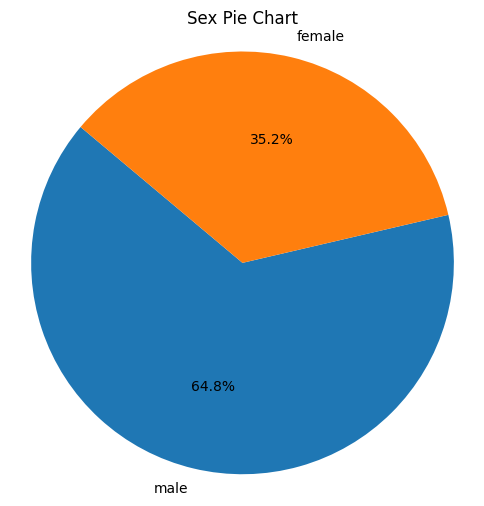

In [21]:
sex_list = train_df['Sex'].value_counts(normalize=True)

labels = sex_list.index.to_list()
sizes = sex_list.values
    
plt.figure(figsize=(6, 6))  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title(f'Sex Pie Chart')
plt.show()

In [22]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


<Axes: xlabel='Sex', ylabel='count'>

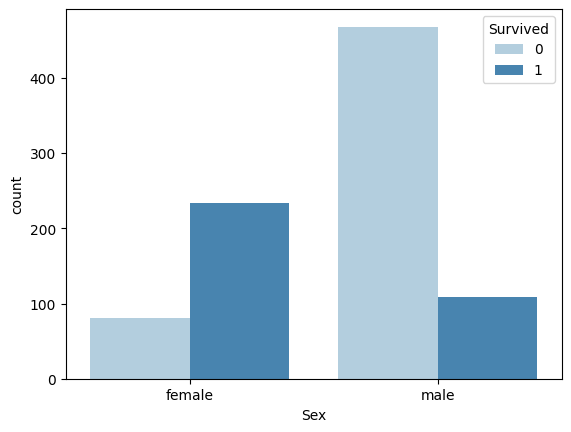

In [23]:
sns.countplot(data=train_df,x='Sex', hue='Survived', palette='Blues')

## Xem xét tỉ lệ sống của nhóm người có giới tính là Female

#### Tạo một data frame với toàn bộ là giới tính Female

In [24]:
femal_df=train_df[train_df['Sex'] == 'female']
femal_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Vẽ biểu đồ với hai cột

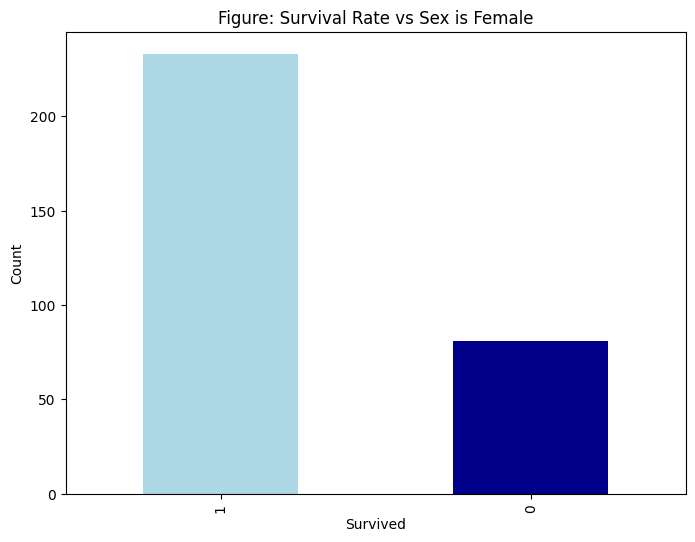

In [25]:
survived_counts = femal_df['Survived'].value_counts()
# Vẽ biểu đồ cột đôi
plt.figure(figsize=(8, 6))
survived_counts.plot(kind='bar', color=['lightblue', 'darkblue'])
plt.title('Figure: Survival Rate vs Sex is Female')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

## Xem xét tỉ lệ sống của nhóm người có giới tính là Male

#### Tạo một data frame với toàn bộ là giới tính Male

In [26]:
male_df=train_df[train_df['Sex'] == 'male']
male_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


### Vẽ biểu đồ với hai cột

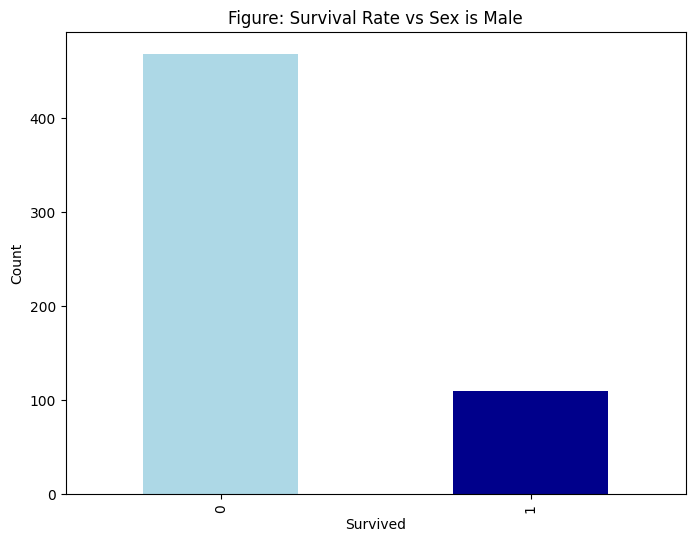

In [27]:
survived_counts = male_df['Survived'].value_counts()
# Vẽ biểu đồ cột đôi
plt.figure(figsize=(8, 6))
survived_counts.plot(kind='bar', color=['lightblue', 'darkblue'])
plt.title('Figure: Survival Rate vs Sex is Male')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

### Các kiểu dữ liệu phân loại còn lại

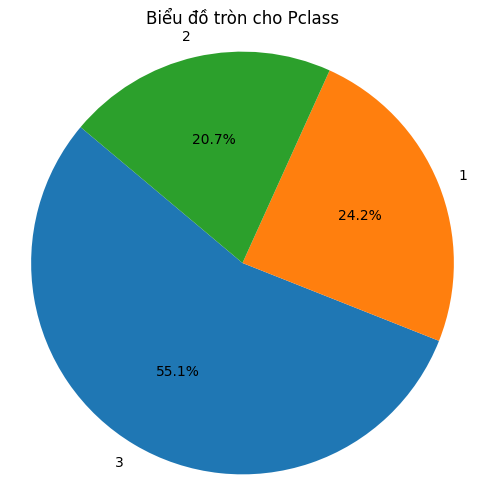

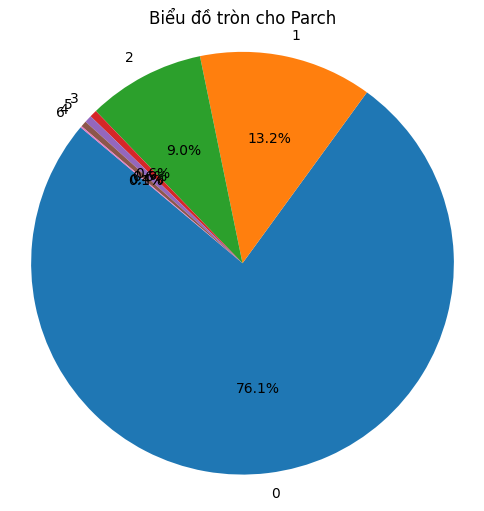

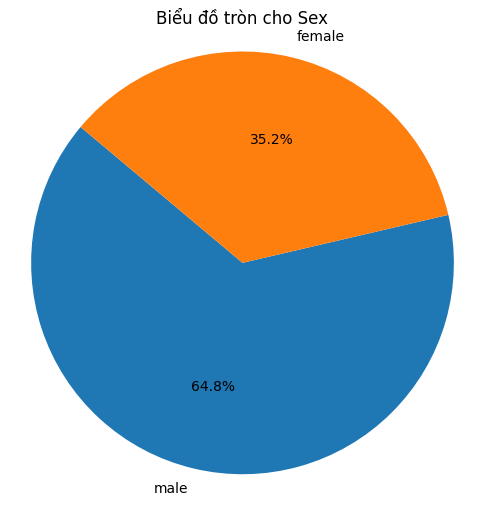

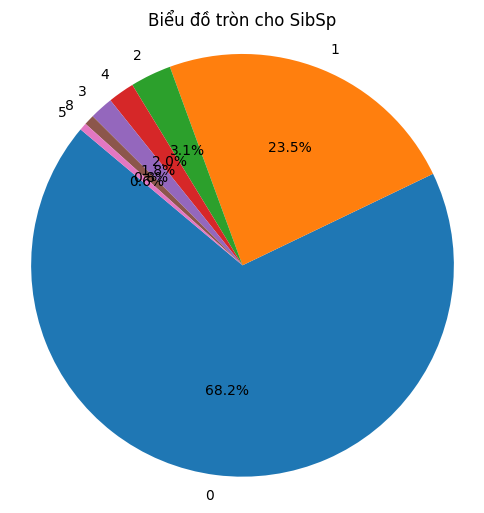

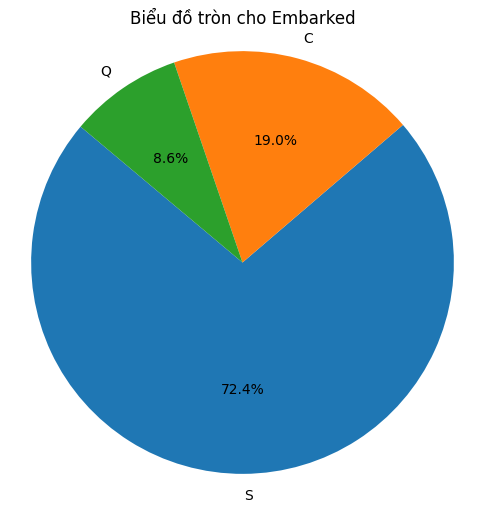

In [28]:
cate_features = ["Pclass","Parch","Sex","SibSp","Embarked"]
cols = 3
rows = 2

for item in cate_features:
    item_frame = train_df[item].value_counts(normalize = True)
    labels = item_frame.index.to_list()
    sizes = item_frame.values
    
    plt.figure(figsize=(6, 6))  
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Biểu đồ tròn cho {item}')
    plt.show()

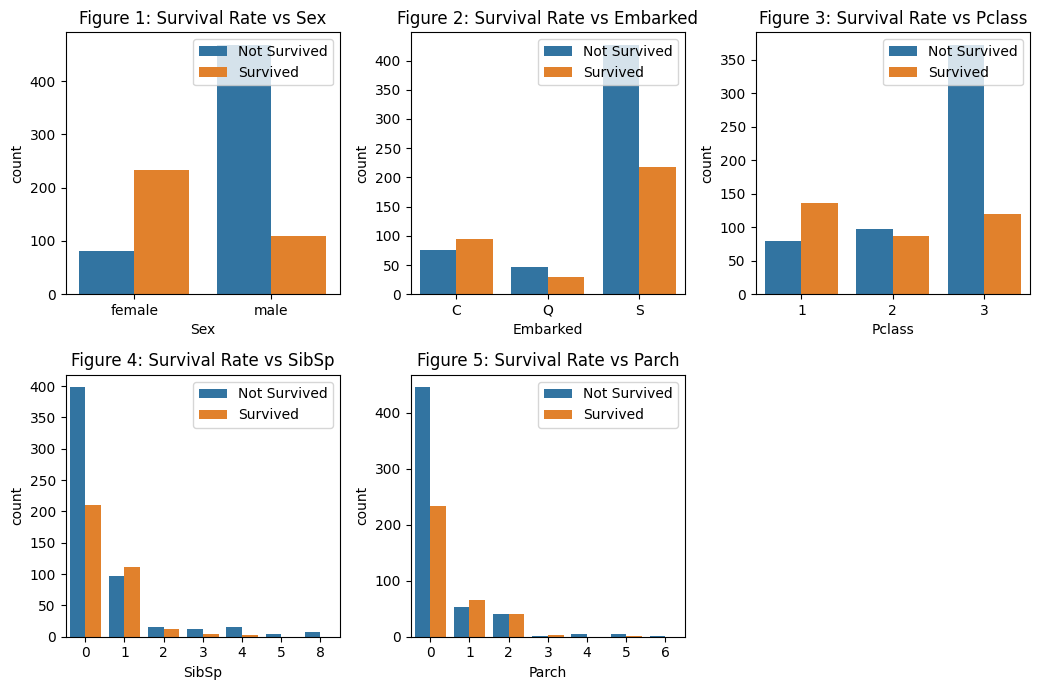

In [29]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_row = 2
n_cols = 3

fig, ax = plt.subplots(n_row, n_cols, figsize=(n_cols*3.5, n_row*3.5))

for r in range(0,n_row):
    for c in range(0,n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue='Survived', ax=ax_i)
            ax_i.set_title(f'Figure {i+1}: Survival Rate vs {cols[i]}')
            ax_i.legend(title='', loc='upper right', labels = ['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False) # xóa subplot cuối
plt.tight_layout()            

# Phân tích khai phá kiểu dữ liệu dạng số

## Age

<Axes: xlabel='Age', ylabel='Count'>

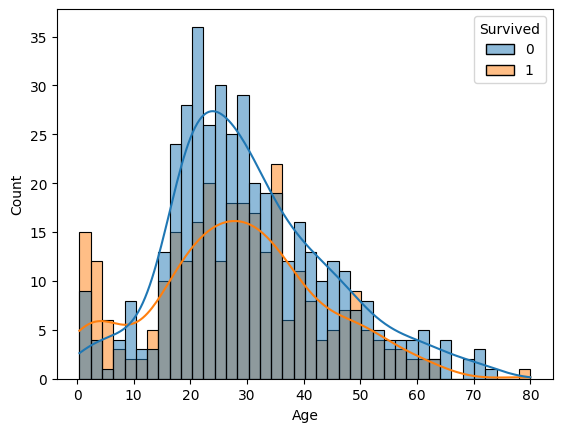

In [30]:
sns.histplot(data=train_df, x='Age', hue='Survived', bins = 40, kde=True)

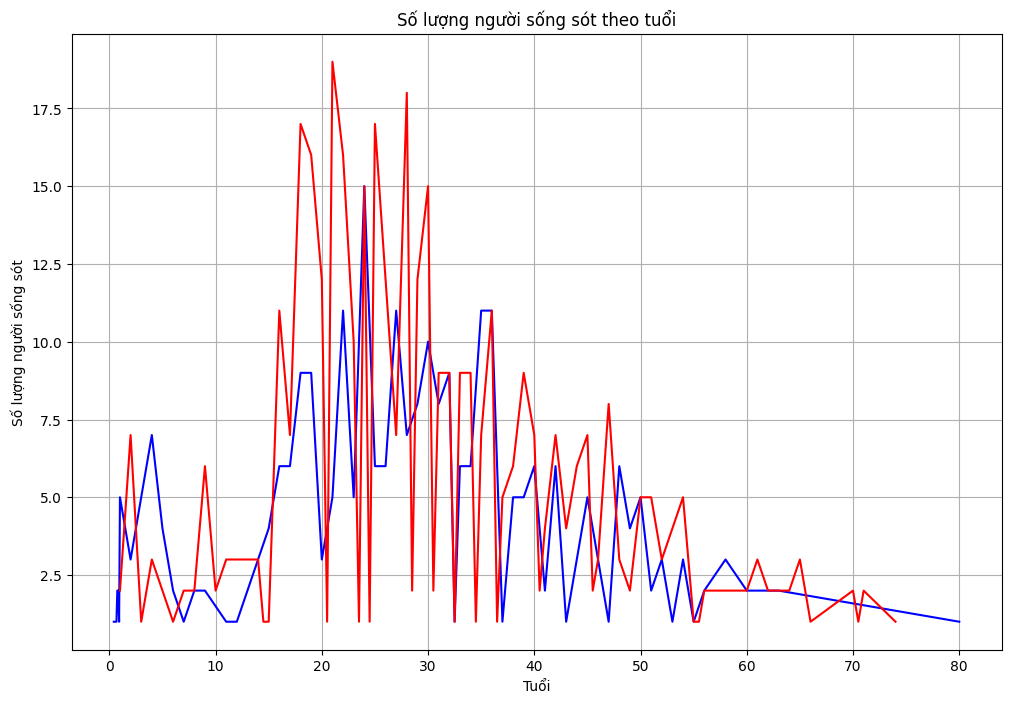

In [31]:
# Trích xuất dữ liệu từ DataFrame
age_survived_counts = train_df[train_df['Survived'] == 1].groupby('Age').size()
age_no_survived_counts = train_df[train_df['Survived'] == 0].groupby('Age').size()
# Vẽ biểu đồ đường
plt.figure(figsize=(12, 8))
age_survived_counts.plot(kind='line', color='b')
age_no_survived_counts.plot(kind='line',color='r')
plt.title('Số lượng người sống sót theo tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng người sống sót')
plt.grid(True)
plt.show()

## Fare

In [32]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

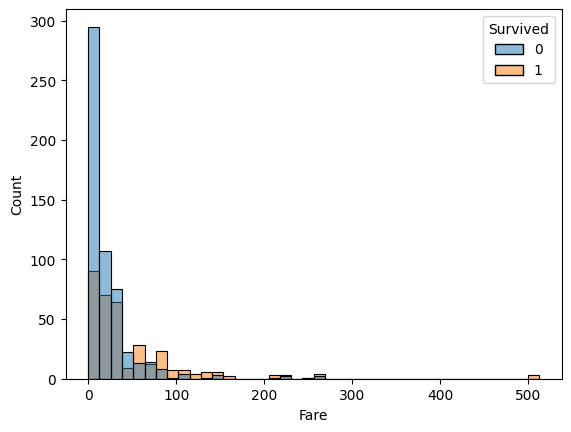

In [33]:
sns.histplot(data=train_df, x='Fare', hue = 'Survived', bins = 40)

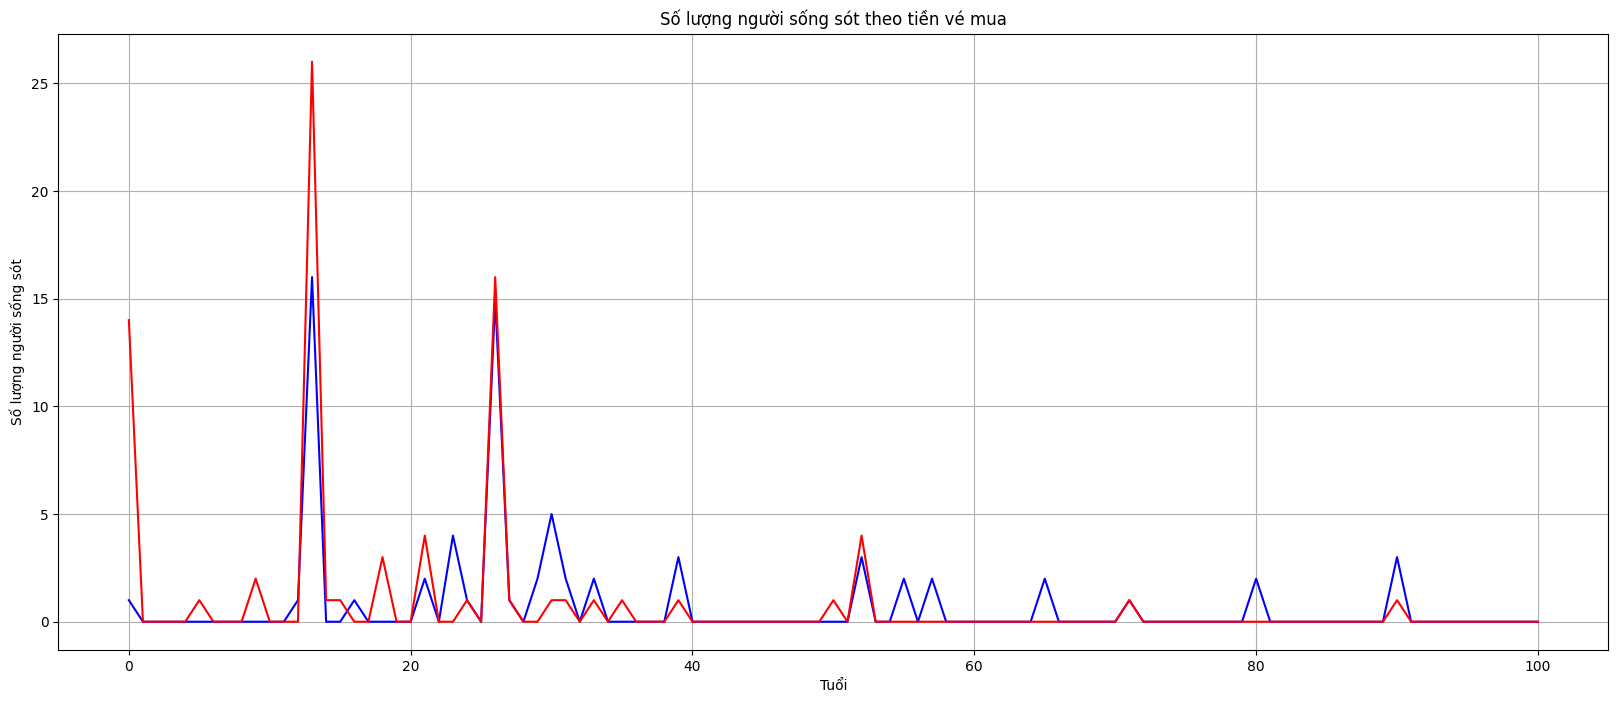

In [34]:
# Trích xuất dữ liệu từ DataFrame
filtered_data = train_df[train_df['Fare'] <= 100]
fare_survived_counts = filtered_data[filtered_data['Survived'] == 1].groupby('Fare').size()
fare_no_survived_counts = filtered_data[filtered_data['Survived'] == 0].groupby('Fare').size()
# Đảm bảo các giá trị còn thiếu được điền bằng 0
fare_survived_counts = fare_survived_counts.reindex(range(0, 101), fill_value=0)
fare_no_survived_counts = fare_no_survived_counts.reindex(range(0, 101), fill_value=0)
# Vẽ biểu đồ đường
plt.figure(figsize=(20, 8))
fare_survived_counts.plot(kind='line',color='b')
fare_no_survived_counts.plot(kind='line',color='r')
plt.title('Số lượng người sống sót theo tiền vé mua')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng người sống sót')
plt.grid(True)
plt.show()

#### Chia nhỏ khoảng cách thành (%) 0-25, 25-50, 50-75, 75-100

<Axes: xlabel='Fare', ylabel='count'>

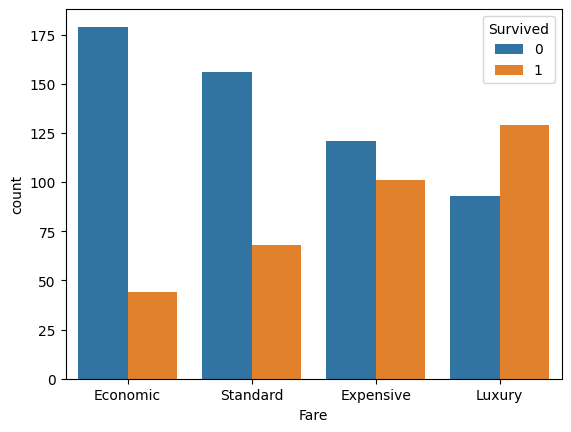

In [35]:
fare_categories = ['Economic', 'Standard','Expensive' ,'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue= train_df['Survived'])

In [36]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

- Phân phối Fare
    - Fare không tuân theo phân phối chuẩn và có mức tăng đột biến ở mức giá `[0-100$]`.
    - Sự phân bổ nghiêng về bên trái với 75% giá vé được trả dưới 31 USD và giá vé được trả tối đa là 512 USD.
- Đồ thị tứ giác:
    - Passenger với Luxury & Expensive Fare sẽ có nhiều cơ hội sống sót hơn.
# Feature Engineering & Data Wrangling
## Name

In [37]:
train_df['Name'].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [38]:
import re #regular expression

def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [39]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [40]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [41]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [42]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else:
        return 'Others'

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

<Axes: xlabel='Title', ylabel='count'>

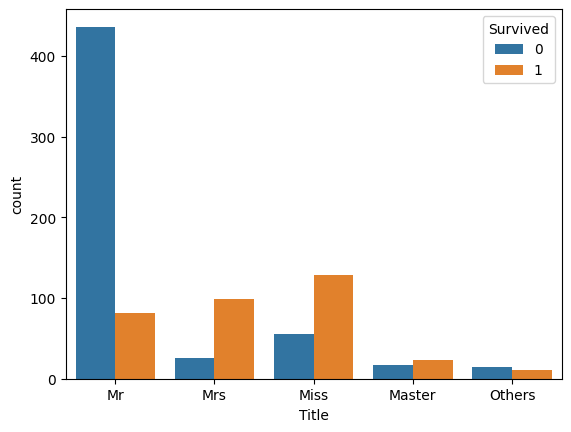

In [43]:
sns.countplot(data=train_df, x='Title', hue='Survived')

## Family
- `SibSp`, `Parch`

In [44]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [45]:
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [46]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins=[0, 1, 4, 6, 20], labels=['Solo', 'Small', 'Medium', 'Large'])
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins=[0, 1, 4, 6, 20], labels=['Solo', 'Small', 'Medium', 'Large'])

<Axes: xlabel='Family_Cat', ylabel='count'>

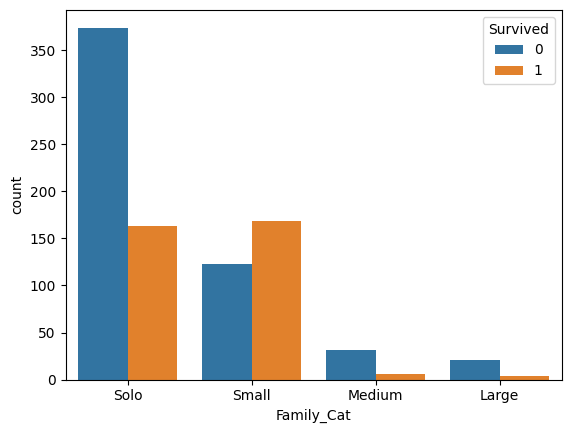

In [47]:
sns.countplot(data=train_df, x='Family_Cat', hue='Survived')

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_20872\2713765582.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  family_cat_counts = train_df.groupby(['Family_Cat', 'Survived']).size().unstack()


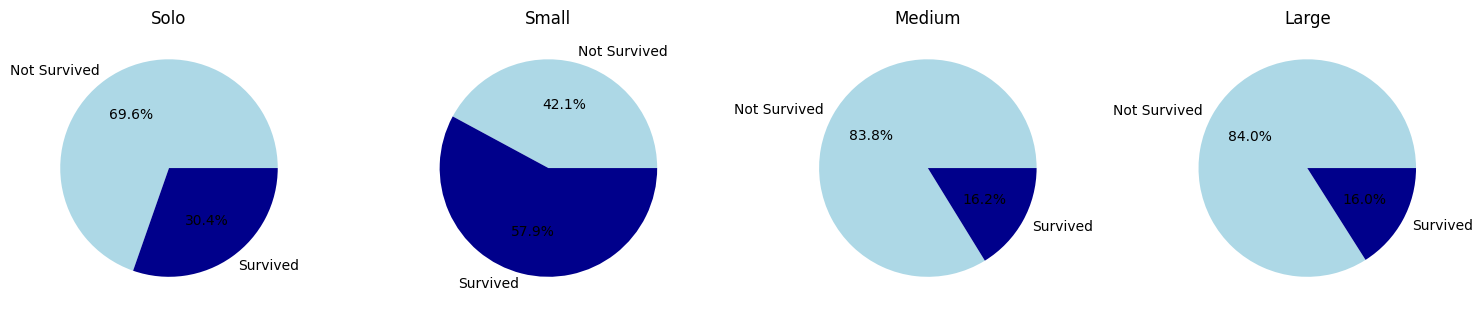

In [48]:
family_cat_counts = train_df.groupby(['Family_Cat', 'Survived']).size().unstack()

fig, axes = plt.subplots(1, len(family_cat_counts.index), figsize=(15, 5))

for i, family_cat in enumerate(family_cat_counts.index):
    counts = family_cat_counts.loc[family_cat]
    axes[i].pie(counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['lightblue', 'darkblue'])
    axes[i].set_title(f'{family_cat}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Data Wrangling


In [49]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [50]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")

display_missing(train_df, feature_cols)

Age has 19.87% missing values.


### Điền giá trị còn thiếu

#### Age
- Điền giá trị còn thiếu với `median` của toàn bộ dataset

In [51]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median(['Age'])['Age']

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_20872\3293687616.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median(['Age'])['Age']


In [52]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

##### Điền giá trị còn thiếu ở Age với medians của Sex và Pclass

In [53]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'], observed=False)['Age'].transform(lambda x: x.fillna(x.median()))


In [54]:
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'], observed=False)['Age'].transform(lambda x: x.fillna(x.median()))

In [55]:
display_missing(train_df, feature_cols)


In [56]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Family_Cat
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Small
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Solo
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Small
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Solo
6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q,Mr,1,Solo
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,1,Solo
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,5,Medium
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,3,Small


Tiền xử lý dữ liệu phục vụ cho KNN


1. Sex:
+ Male: 0
+ Female: 1
2. Embarked:
+ C: 1
+ S: 2
+ Q: 3
3. Title:
+ Mr: 1
+ Mrs: 2
+ Miss: 3
+ Others: 4

In [57]:
train_df['Sex'] = train_df['Sex'].astype(str)
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'C': 1, 'S': 2, 'Q':3})
train_df['Title'] = train_df['Title'].map({'Mr': 1, 'Mrs': 2, 'Miss':3, 'Others':4})
train_df = train_df.dropna()

- Drop các cột có giá trị null, trong trường hợp này, thấy có 40 giá trị null trong cột 'Title' và 2 giá trị trong cột 'Embarked'

### Như vậy, mô hình đã được phân tích và tiền xử lý thành công!

## Chọn Mô hình KNN để train cho tập dữ liệu

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X =  train_df.drop(columns=['Survived','Cabin','Name','Family_Cat','Ticket'])
y = train_df['Survived']  # Target

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Chọn mô hình và huấn luyện
knn_model = KNeighborsClassifier(n_neighbors=5)  # Chọn số láng giềng là 5
knn_model.fit(x_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn_model.predict(x_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
X

Accuracy: 0.5252525252525253


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size
PassengerId,,,,,,,,,
2,1,1,38.0,1,0,71.2833,1,2.0,2
4,1,1,35.0,1,0,53.1000,2,2.0,2
7,1,0,54.0,0,0,51.8625,2,1.0,1
11,3,1,4.0,1,1,16.7000,2,3.0,3
12,1,1,58.0,0,0,26.5500,2,3.0,1
...,...,...,...,...,...,...,...,...,...
872,1,1,47.0,1,1,52.5542,2,2.0,3
873,1,0,33.0,0,0,5.0000,2,1.0,1
880,1,1,56.0,0,1,83.1583,1,2.0,2
